Run all cells at once , in top menu select Kernel > Restart and Run All

<h1 id="Code-Submission-for-CMAP-Geoprocessing.">Code Submission for CMAP Assignment.</h1>
<h3 id="By-Moazam-Iqbal-Hakim">By Moazam Iqbal Hakim (<a href="mailto:mihakim2@illinois.edu">mihakim2@illinois.edu</a>)</h3><br>
For-this-assignment,-the-entire-process-has-been-done-in-Python-on-jupyter-Notebook.-The-requred-Shapefile-and-Table-(.csv)-could-be-exported-by-running-the-entire-pipeline.-These-files-are-also-enclosed-in-the-main-directery-for-this-notebook.">For this assignment, the entire process has been done in Python on Jupiter Notebook. The required Shapefile and Table (.csv) could be exported by running the entire pipeline. These files are also enclosed in the main directory for this notebook.
<p><strong>This notebook comprises four parts. </strong></p>
<p><strong>1) Data Import and Processing</strong><span style="color: #ff0000;"> <em>(Most requirements of the assignment are covered here)</em></span></p>
<p><strong>2) Data Analysis </strong>- Prelimnary Analysis of findings.</p>
<p><strong>3) Data Validation </strong>- Validating the spatial join and process used.</p>
<p><strong>4) Data Visualization</strong>- Sample elements for dashboard.</p>
<p><br /><em>(Note: Some extra steps in the process have been extended over multiple cells, for easy understanding.)</em><br /><br />Date- 3/2/2021</p>
<p><img style="display: block; margin-left: auto; margin-right: auto;" src="https://patch.com/img/cdn20/users/37684/20161229/013623/styles/raw/public/article_images/201605573b9c5198b72-1483036578-9771.jpg" alt="Chicago's Divvy Bike Share Will be Third in U.S. to Reach 10 Million Riders  | Chicago, IL Patch" width="544" height="408" /><br /><em>Data Credits-</em><br /><em>1) DIVVY Chicago&nbsp; &nbsp; &nbsp;</em><em>2) CMAP&nbsp; &nbsp; &nbsp; &nbsp; </em><em>3) U.S Census Bureau</em></p>
<p><em>Photo Credit: Patch.com</em></p>

## 1) Data Import and Processing

In [56]:
%%capture
!pip install rtree
!pip install descartes

In [57]:
# import the required Python Libraries
import requests
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import geopandas as gpd
warnings.filterwarnings('ignore')
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import mapclassify
import rtree
print("All Good!")


All Good!


The JSON file comprising of the Dock information from the DIVVY website comprises of data in Dictionary form. Prelimnary visual analysis for identification of data structure and types is being done below to organize the data in a pandas dataframe for easy analysis and processing.

In [2]:
# Loading the JSON file
url = 'https://gbfs.divvybikes.com/gbfs/en/station_information.json'
data = requests.get(url).json()

#print(data)

In [3]:
print(type(data))

<class 'dict'>


In [4]:
# Selecting the sub-classes of the Python dictionary using keys.
data_list = data['data']['stations']

In [5]:
# Convert the dictionary to Pandas Dataframe.
df_full = pd.DataFrame(data_list)

In [6]:
# Dataframe for complete dataset including unwanted columns.
df_full.head(5)

,eightd_station_services,short_name,external_id,station_id,legacy_id,capacity,electric_bike_surcharge_waiver,station_type,lon,name,...,lat,rental_uris,rental_methods,eightd_has_key_dispenser,region_id,region_code,address,rack_model,dockless_bikes_parking_zone_capacity,client_station_id
0,[],15541,a3a36d9e-a135-11e9-9cda-0a87ae2ba916,2,2,39,False,classic,-87.620548,Buckingham Fountain,...,41.876511,{'android': 'https://chi.lft.to/lastmile_qr_sc...,"[KEY, CREDITCARD, TRANSITCARD]",False,NaN,NaN,NaN,NaN,NaN,NaN
1,[],15544,a3a37378-a135-11e9-9cda-0a87ae2ba916,3,3,55,False,classic,-87.615355,Shedd Aquarium,...,41.867226,{'android': 'https://chi.lft.to/lastmile_qr_sc...,"[KEY, CREDITCARD, TRANSITCARD]",False,NaN,NaN,NaN,NaN,NaN,NaN
2,[],15545,a3a378ca-a135-11e9-9cda-0a87ae2ba916,4,4,23,False,classic,-87.613348,Burnham Harbor,...,41.856268,{'android': 'https://chi.lft.to/lastmile_qr_sc...,"[KEY, CREDITCARD, TRANSITCARD]",False,NaN,NaN,NaN,NaN,NaN,NaN
3,[],SL-007,a3a37e26-a135-11e9-9cda-0a87ae2ba916,5,5,23,False,classic,-87.627716,State St & Harrison St,...,41.874053,{'android': 'https://chi.lft.to/lastmile_qr_sc...,"[KEY, CREDITCARD, TRANSITCARD]",False,NaN,NaN,NaN,NaN,NaN,NaN
4,[],KA1503000064,a3a38363-a135-11e9-9cda-0a87ae2ba916,6,6,39,False,classic,-87.612813,Dusable Harbor,...,41.886976,{'android': 'https://chi.lft.to/lastmile_qr_sc...,"[KEY, CREDITCARD, TRANSITCARD]",False,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#New Dataframe comprising of only desired columns. Being stored as df.
df = df_full[['station_id', 'name', 'capacity', 'lat', 'lon']]

In [8]:
#Checking the new dataframe structure.
df.head()

,station_id,name,capacity,lat,lon
0,2,Buckingham Fountain,39,41.876511,-87.620548
1,3,Shedd Aquarium,55,41.867226,-87.615355
2,4,Burnham Harbor,23,41.856268,-87.613348
3,5,State St & Harrison St,23,41.874053,-87.627716
4,6,Dusable Harbor,39,41.886976,-87.612813


In [9]:
# verifying for any NULL or NaN values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  689 non-null    object 
 1   name        689 non-null    object 
 2   capacity    689 non-null    int64  
 3   lat         689 non-null    float64
 4   lon         689 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 27.0+ KB


In [10]:
# Extracting the lat, lon from the dataframe to form the Geometry

from shapely.geometry import Point

# combine lat and lon column to a shapely Point() object
df['Geometry'] = df.apply(lambda x: Point((float(x.lon), float(x.lat))), axis=1)

In [11]:
# Loading the dataframe into geopandas along with the Geometry
df_shape = gpd.GeoDataFrame(df, geometry='Geometry')

# Inititalizing the Coordinate System to WGS 84 using identifier 4326
df_shape.crs = {'init' :'epsg:4326'}

In [12]:
# Exporting the geopandas dataframe as Shapefile.
df_shape.to_file('divvy_stations.shp', driver='ESRI Shapefile')

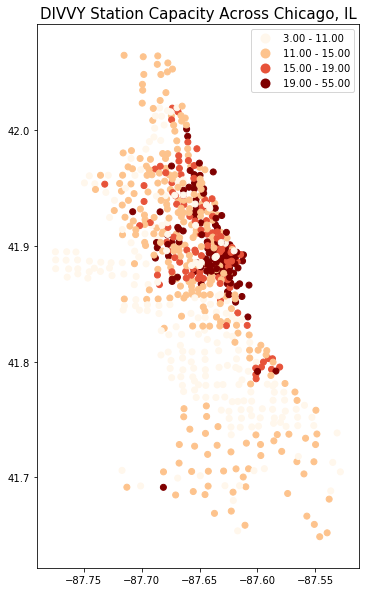

In [13]:
# Visualizing the exported Shapefile using geopandas.

gdf = gpd.read_file('divvy_stations.shp')

%matplotlib inline
fig, ax = plt.subplots(figsize=(15,10))

gdf.plot(
    column='capacity', ax=ax, legend=True,  scheme='quantiles', cmap='OrRd')
plt.title(('DIVVY Station Capacity Across Chicago, IL'), color ='black', fontsize='15');

#### For this assignment we will directly import the desired shapefiles into Python environment from the provided zip file ie Datasets.zip

In [14]:
# Importing the Shapefiles using Geopandas.

CCA = gpd.read_file('zip://Datasets.zip!Datasets/ChicagoCommunityAreas.shp')
CCB= gpd.read_file('zip://Datasets.zip!Datasets/CensusBlocks_Population2010.shp')
DIVVY_ST = gpd.read_file('divvy_stations.shp')

In [15]:
# Verifying the Attributes of the ChicagoCommunityAreas using GeoPandas dataframe.
CCA.head(5)

,COMMUNITY,CCA_NUM,geometry
0,DOUGLAS,35,"POLYGON ((1181573.250 1886828.040, 1181571.200..."
1,OAKLAND,36,"POLYGON ((1186289.356 1876750.733, 1186247.037..."
2,FULLER PARK,37,"POLYGON ((1176344.998 1871187.546, 1176346.500..."
3,GRAND BOULEVARD,38,"POLYGON ((1182322.043 1876674.731, 1182323.670..."
4,KENWOOD,39,"POLYGON ((1186289.356 1876750.733, 1186290.775..."


In [16]:
# Verifying the Attributes of the CensusBlocks_Population2010 using GeoPandas dataframe.
CCB.head(5)

,GEOID10,POP2010,geometry
0,170315705001020,69.0,"POLYGON ((1148076.782 1869778.337, 1147976.725..."
1,170315608002002,43.0,"POLYGON ((1138079.470 1869525.837, 1138066.815..."
2,170317402004007,155.0,"POLYGON ((1154529.159 1834768.487, 1154463.087..."
3,170317402004011,28.0,"POLYGON ((1153489.207 1835909.589, 1153655.750..."
4,170317503003008,38.0,"POLYGON ((1160483.736 1832244.372, 1160478.782..."


In [17]:
# Checking the Cordinate System for the two shapefiles.
CCA.crs, CCB.crs

# these are different from the Divvy Dock file we prepared previously (epsg 4326)

(<Projected CRS: EPSG:3435>
 Name: NAD83 / Illinois East (ftUS)
 Axis Info [cartesian]:
 - X[east]: Easting (US survey foot)
 - Y[north]: Northing (US survey foot)
 Area of Use:
 - name: USA - Illinois - SPCS - E
 - bounds: (-89.28, 37.06, -87.02, 42.5)
 Coordinate Operation:
 - name: SPCS83 Illinois East zone (US Survey feet)
 - method: Transverse Mercator
 Datum: North American Datum 1983
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich,
 <Projected CRS: EPSG:3435>
 Name: NAD83 / Illinois East (ftUS)
 Axis Info [cartesian]:
 - X[east]: Easting (US survey foot)
 - Y[north]: Northing (US survey foot)
 Area of Use:
 - name: USA - Illinois - SPCS - E
 - bounds: (-89.28, 37.06, -87.02, 42.5)
 Coordinate Operation:
 - name: SPCS83 Illinois East zone (US Survey feet)
 - method: Transverse Mercator
 Datum: North American Datum 1983
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich)

In [18]:
# Re-projecting coordinate reference systems of the dataframes to epsg:4326 (WGS94)
CCA=CCA.to_crs({'init':'epsg:4326'})
CCB= CCB.to_crs({'init':'epsg:4326'})
DIVVY_ST = DIVVY_ST.to_crs({'init':'epsg:4326'}) # not needed though
CCA.crs, CCB.crs, DIVVY_ST.crs

(<Geographic 2D CRS: +init=epsg:4326 +type=crs>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - lon[east]: Longitude (degree)
 - lat[north]: Latitude (degree)
 Area of Use:
 - name: World
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: +init=epsg:4326 +type=crs>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - lon[east]: Longitude (degree)
 - lat[north]: Latitude (degree)
 Area of Use:
 - name: World
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: +init=epsg:4326 +type=crs>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - lon[east]: Longitude (degree)
 - lat[north]: Latitude (degree)
 Area of Use:
 - name: World
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

### We now have all our data loaded into python environment and all coordinate reference systems set up for any spatial analysis to be done correctly.

First we will calculate the total population for each of the Chicago Community Area using the Spatial Join feature of GeoPandas library.

In [19]:
#get a spatial join of ccb and cca for population cstatistics

CCA_CB=gpd.sjoin(CCA, CCB, how='left', op='contains')

In [20]:
CCA.shape,CCB.shape, CCA_CB.shape

((77, 3), (46324, 3), (41339, 6))

In [21]:
# Census tracts now have a defined Community Name and Community Number.
CCA_CB.head(10)

,COMMUNITY,CCA_NUM,geometry,index_right,GEOID10,POP2010
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",44058,170318420002000,141.0
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",1170,170318420001006,93.0
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",28762,170318420001005,78.0
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",39733,170318420001002,39.0
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",30467,170318420001001,47.0
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",39734,170318420001000,33.0
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",16872,170318395001001,95.0
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",14986,170318395001000,0.0
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",36334,170313510003003,0.0
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",34810,170318420001004,23.0


Using the above dataframe we will regroup the data and aggregare on the POP2010 column for each Community Number and Community name.

In [22]:
CCA_pop=CCA_CB.groupby(['CCA_NUM','COMMUNITY']).agg({'POP2010': 'sum'}).reset_index() 

In [23]:
CCA_pop.head()

,CCA_NUM,COMMUNITY,POP2010
0,1,ROGERS PARK,48106.0
1,2,WEST RIDGE,66617.0
2,3,UPTOWN,51776.0
3,4,LINCOLN SQUARE,36612.0
4,5,NORTH CENTER,29145.0


In [24]:
# Check the meta data for the data. Check for any None Values as possible errors.
CCA_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CCA_NUM    77 non-null     int64  
 1   COMMUNITY  77 non-null     object 
 2   POP2010    77 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


In [25]:
# Lets take a look at out DIVVY dataframe from the shapefile we exported.
DIVVY_ST.head()

,station_id,name,capacity,lat,lon,geometry
0,2,Buckingham Fountain,39,41.876511,-87.620548,POINT (-87.62055 41.87651)
1,3,Shedd Aquarium,55,41.867226,-87.615355,POINT (-87.61536 41.86723)
2,4,Burnham Harbor,23,41.856268,-87.613348,POINT (-87.61335 41.85627)
3,5,State St & Harrison St,23,41.874053,-87.627716,POINT (-87.62772 41.87405)
4,6,Dusable Harbor,39,41.886976,-87.612813,POINT (-87.61281 41.88698)


We would need to do a second Spatial Join for the CCA_Pop dataframe that includes total population counts for each Community and the DIVVY_ST dataframe which has the individual dock location and information.

In [26]:
#Perform Spatial Join
CCA_DIVVY=gpd.sjoin(CCA, DIVVY_ST, how='left', op='contains')

In [27]:
CCA_DIVVY.shape, CCA.shape

((693, 9), (77, 3))

In [28]:
# We now have Community Name and Number assigned for each of the DIVVY Station.
CCA_DIVVY.head()

,COMMUNITY,CCA_NUM,geometry,index_right,station_id,name,capacity,lat,lon
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",162.0,179,MLK Jr Dr & Pershing Rd,15.0,41.824600,-87.616780
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",369.0,406,Lake Park Ave & 35th St,19.0,41.831274,-87.608799
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",312.0,335,Calumet Ave & 35th St,15.0,41.831379,-87.618034
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",134.0,149,Calumet Ave & 33rd St,11.0,41.834900,-87.617930
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",242.0,263,Rhodes Ave & 32nd St,11.0,41.836208,-87.613533


In [29]:
# Group and aggregate for capacity.
CCA_DIVVY_AGG=CCA_DIVVY.groupby(['CCA_NUM','COMMUNITY']).agg({'capacity': 'sum'}).reset_index()

In [30]:
CCA_DIVVY_AGG.head()

,CCA_NUM,COMMUNITY,capacity
0,1,ROGERS PARK,255.0
1,2,WEST RIDGE,107.0
2,3,UPTOWN,278.0
3,4,LINCOLN SQUARE,254.0
4,5,NORTH CENTER,176.0


In [31]:
CCA_DIVVY_AGG.info() # Checking for any Null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CCA_NUM    77 non-null     int64  
 1   COMMUNITY  77 non-null     object 
 2   capacity   77 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


Since we have all data prepped, we can now merge the data and prepare a final table for export.

In [32]:
#merging CCA_pop (Total Population for each Community Area) and CCA_DIVVY_AGG (Total dock capacity of Each Community Area) 
CCA_DIVVY_POP=pd.merge(CCA_pop,CCA_DIVVY_AGG[['capacity', 'CCA_NUM']], on= 'CCA_NUM',how='left') 

In [33]:
CCA_DIVVY_POP.shape # Checking the structure of table.

(77, 4)

In [34]:
CCA_DIVVY_POP.head()

,CCA_NUM,COMMUNITY,POP2010,capacity
0,1,ROGERS PARK,48106.0,255.0
1,2,WEST RIDGE,66617.0,107.0
2,3,UPTOWN,51776.0,278.0
3,4,LINCOLN SQUARE,36612.0,254.0
4,5,NORTH CENTER,29145.0,176.0


In [35]:
#Check for Null values
CCA_DIVVY_POP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CCA_NUM    77 non-null     int64  
 1   COMMUNITY  77 non-null     object 
 2   POP2010    77 non-null     float64
 3   capacity   77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.0+ KB


In [36]:
#Compute Population Per Dock.
CCA_DIVVY_POP['POP/DOCK']=CCA_DIVVY_POP['POP2010']/CCA_DIVVY_POP['capacity']

In [37]:
CCA_DIVVY_POP.head()

,CCA_NUM,COMMUNITY,POP2010,capacity,POP/DOCK
0,1,ROGERS PARK,48106.0,255.0,188.650980
1,2,WEST RIDGE,66617.0,107.0,622.588785
2,3,UPTOWN,51776.0,278.0,186.244604
3,4,LINCOLN SQUARE,36612.0,254.0,144.141732
4,5,NORTH CENTER,29145.0,176.0,165.596591


In [38]:
CCA_DIVVY_POP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CCA_NUM    77 non-null     int64  
 1   COMMUNITY  77 non-null     object 
 2   POP2010    77 non-null     float64
 3   capacity   77 non-null     float64
 4   POP/DOCK   77 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.6+ KB


In [39]:
#Some housekeeping.
CCA_DIVVY_POP.rename(columns = {'capacity':'CAPACITY'}, inplace = True) 

# Export as CSV file.
CCA_DIVVY_POP.to_csv('Chicao_Divvy_Pop_Per_Dock.csv', index=False)

## 2) Data Analysis

In [40]:
CCA.head()

,COMMUNITY,CCA_NUM,geometry
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,OAKLAND,36,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,FULLER PARK,37,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,GRAND BOULEVARD,38,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,KENWOOD,39,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [41]:
#Combining the evaluated table with CCA data that includes spatial information.
CCA_new = pd.merge(CCA, CCA_DIVVY_POP, on=['COMMUNITY','CCA_NUM'])

In [42]:
CCA_new.head()

,COMMUNITY,CCA_NUM,geometry,POP2010,CAPACITY,POP/DOCK
0,DOUGLAS,35,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",15579.0,173.0,90.052023
1,OAKLAND,36,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",3844.0,0.0,inf
2,FULLER PARK,37,"POLYGON ((-87.62880 41.80189, -87.62879 41.801...",2516.0,33.0,76.242424
3,GRAND BOULEVARD,38,"POLYGON ((-87.60671 41.81681, -87.60670 41.816...",18689.0,104.0,179.701923
4,KENWOOD,39,"POLYGON ((-87.59215 41.81693, -87.59215 41.816...",12421.0,90.0,138.011111


In [43]:
CCA_new.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   COMMUNITY  77 non-null     object  
 1   CCA_NUM    77 non-null     int64   
 2   geometry   77 non-null     geometry
 3   POP2010    77 non-null     float64 
 4   CAPACITY   77 non-null     float64 
 5   POP/DOCK   77 non-null     float64 
dtypes: float64(3), geometry(1), int64(1), object(1)
memory usage: 4.2+ KB


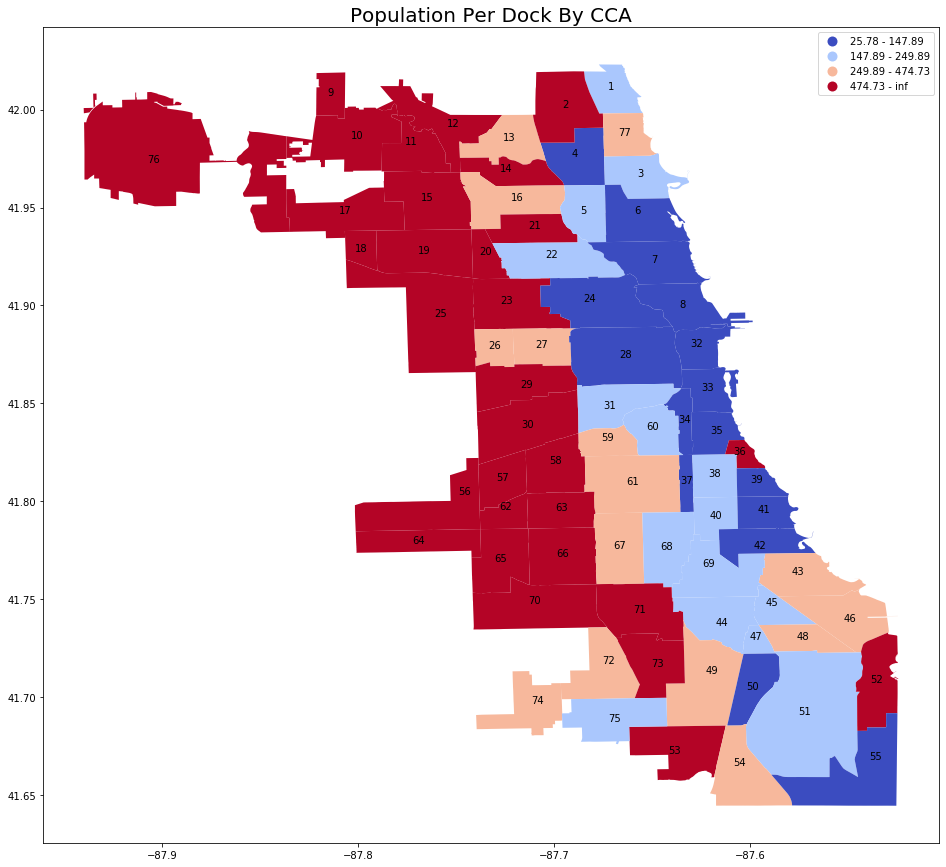

In [44]:
#sample plot with the new data
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,15))
df=CCA_new
df.plot(
    column='POP/DOCK', ax=ax, legend=True,  scheme='quantiles', cmap='coolwarm',
)
plt.title(('Population Per Dock By CCA'), color ='black', fontsize='20')
# In order to get labels for each Community lets extract cordinates and assign a representative point.
df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coords'] = [coords[0] for coords in df['coords']]
for idx, row in df.iterrows():
    plt.annotate(s=row['CCA_NUM'], xy=row['coords'],horizontalalignment='center')

In [45]:
# Export as a Shapefile.
CCA_new = pd.merge(CCA, CCA_DIVVY_POP, on=['COMMUNITY','CCA_NUM'])
CCA_new.to_file('cc_divvy_pop_per_dock.shp', driver='ESRI Shapefile')

## 3) Data Validation

To validate the performance of spatial joins we will use the provided sample DIVVY dock stations shapefile and compare it for the same region in the dataframe evalauated above for any difference in total sum of Docks.

In [46]:
#import the sample file
DIVVY_sample = gpd.read_file('zip://Datasets.zip!Datasets/DivvyStations_Docks20210219_Sample.shp')
DIVVY_sample=DIVVY_sample.to_crs({'init':'epsg:4326'}) #ensuring projection as wgs84
DIVVY_sample.head()

,DOCKS,geometry
0,35,POINT (-87.65270 41.93242)
1,15,POINT (-87.65311 41.91052)
2,15,POINT (-87.63772 41.90292)
3,15,POINT (-87.62058 41.89185)
4,23,POINT (-87.62351 41.89766)


In [47]:
#Spatial Join Sample with CCA boundaries
CCA_DIVVY_SAM=gpd.sjoin(CCA, DIVVY_sample, how='left', op='contains')

# Group and aggregate for capacity.
CCA_DIVVY_AGG_SAM=CCA_DIVVY_SAM.groupby(['CCA_NUM','COMMUNITY']).agg({'DOCKS': 'sum'}).reset_index()
CCA_DIVVY_AGG_SAM.head(10)

,CCA_NUM,COMMUNITY,DOCKS
0,1,ROGERS PARK,255.0
1,2,WEST RIDGE,107.0
2,3,UPTOWN,278.0
3,4,LINCOLN SQUARE,254.0
4,5,NORTH CENTER,176.0
5,6,LAKE VIEW,659.0
6,7,LINCOLN PARK,751.0
7,8,NEAR NORTH SIDE,1157.0
8,9,EDISON PARK,0.0
9,10,NORWOOD PARK,0.0


The sample dataset only comprised of data for 8 Communities for which the total number of DOCKS were evaluated.

### Now the total of docking stations in 8 communities from Sample file and for same 8 communities from prepared dataset has been compared.

In [48]:
#merging CCA_pop (Total Population for each Community Area) and CCA_DIVVY_AGG (Total dock capacity of Each Community Area) 
CCA_DIVVY_POP_SAM=pd.merge(CCA_pop,CCA_DIVVY_AGG_SAM[['DOCKS', 'CCA_NUM']], on= 'CCA_NUM',how='left') 

CCA_DIVVY_POP_SAMv2= CCA_DIVVY_POP_SAM.iloc[0:8] #Selecting CCA NUM from 1 to 8
TotalDocks=CCA_DIVVY_POP_SAMv2['DOCKS'].sum() #Sum of All the Docs in CCA-NUM 1 to 8
print("Total Docks based on Provided DIVVY Station Sample", TotalDocks)
CCA_DIVVY_POP_SAMv2.head(10)

Total Docks based on Provided DIVVY Station Sample 3637.0


,CCA_NUM,COMMUNITY,POP2010,DOCKS
0,1,ROGERS PARK,48106.0,255.0
1,2,WEST RIDGE,66617.0,107.0
2,3,UPTOWN,51776.0,278.0
3,4,LINCOLN SQUARE,36612.0,254.0
4,5,NORTH CENTER,29145.0,176.0
5,6,LAKE VIEW,84721.0,659.0
6,7,LINCOLN PARK,59804.0,751.0
7,8,NEAR NORTH SIDE,75695.0,1157.0


In [49]:
#Extracting these 8 Rows of data from our evaluated dataframe CCA_DIVVY_POP. ie CCA_NUM 1-8
CCA_DIVVY_POPv2= CCA_DIVVY_POP.iloc[0:8]
TotalDocks=CCA_DIVVY_POPv2['CAPACITY'].sum()
print("Total Docks based on DIVVY Station from JSON feed", TotalDocks)
CCA_DIVVY_POPv2.head(10)

Total Docks based on DIVVY Station from JSON feed 3637.0


,CCA_NUM,COMMUNITY,POP2010,CAPACITY,POP/DOCK
0,1,ROGERS PARK,48106.0,255.0,188.650980
1,2,WEST RIDGE,66617.0,107.0,622.588785
2,3,UPTOWN,51776.0,278.0,186.244604
3,4,LINCOLN SQUARE,36612.0,254.0,144.141732
4,5,NORTH CENTER,29145.0,176.0,165.596591
5,6,LAKE VIEW,84721.0,659.0,128.559939
6,7,LINCOLN PARK,59804.0,751.0,79.632490
7,8,NEAR NORTH SIDE,75695.0,1157.0,65.423509


### Hence validated!

## 4) Data Visualization

#### In this section an attempt is made to visualize the information and make it interactive by creating dashboard elements using the data prepared.

In [50]:
def f(Type='CAPACITY'):
    df=CCA_new
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(20,15))
    
    if Type=='CAPACITY':
        cmap='Oranges'
        x=800
    elif Type=='POP/DOCK':
        cmap = 'coolwarm'
        x=500
    else:
        cmap= 'Reds'
        x=80000
    
    df.plot(
        column=Type, ax=ax, legend=True,  scheme='quantiles', cmap=cmap)
    plt.title((Type+ ' in 77 Chicago Community Areas (CCAs)'), color ='black', fontsize='20')
   
    # In order to get labels for each Community lets extract cordinates and assign a representative point.
    df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
    df['coords'] = [coords[0] for coords in df['coords']]
    for idx, row in df.iterrows():
        plt.annotate(s=row['CCA_NUM'], xy=row['coords'],horizontalalignment='center')
    plt.show()
print("Please select a type from the dropdown")
interactive_plot = interactive(f, Type=['POP/DOCK','POP2010', 'CAPACITY'])
output = interactive_plot.children[-1]
interactive_plot

Please select a type from the dropdown


interactive(children=(Dropdown(description='Type', index=2, options=('POP/DOCK', 'POP2010', 'CAPACITY'), value…

### Mini DashBoard

In [51]:
def f(Community='LOOP'):
    df =CCA_new.loc[CCA_new['COMMUNITY'] == Community]
    print('Name of Community:', Community)
    print('CCA Number:',df['CCA_NUM'].iloc[0])
    print('Total Population as per 2010 Census:',df['POP2010'].iloc[0])
    print('Total Docking Capacity:',df['CAPACITY'].iloc[0])
    print('Population Per Dock Ratio:',df['POP/DOCK'].iloc[0])
    
    if df['CAPACITY'].iloc[0] == 0:
        print("This Community has No Dock Station and hence Can't be plotted. Please select another.")
    else:
        %matplotlib inline
        fig, ax = plt.subplots(figsize=(12,10))
        ax= df.plot(column='CAPACITY',ax=ax, scheme='quantiles', cmap='GnBu', label = Community)
        ax.margins(tight=False)


        df2 =CCA_DIVVY.loc[CCA_DIVVY['COMMUNITY'] == Community]
        plt.xlim(df2['lon'].min()-0.01,df2['lon'].max()+0.01)
        plt.ylim(df2['lat'].min()-0.01,df2['lat'].max()+0.01)
        plt.scatter(x=df2['lon'], y=df2['lat'], label = 'Stations')
        ax.legend()
        plt.title(('DIVVY Stations in '+Community+' Community'), color ='black', fontsize='20')
        print('Total Stations in Community:',df2['lat'].count())
print("Please select a Community from the dropdown")
CC_names=CCA_new['COMMUNITY'].tolist()
interactive_plot = interactive(f, Community=CC_names)
output = interactive_plot.children[-1]
interactive_plot


Please select a Community from the dropdown


interactive(children=(Dropdown(description='Community', index=37, options=('DOUGLAS', 'OAKLAND', 'FULLER PARK'…

#### End of Notebook. Thank You.

In [55]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p rtree

# date
print (" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.13.0

rtree: 0.9.4

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 3.10.0-1062.9.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 10
Architecture: 64bit

 
Last updated: Tue Mar 02 2021 07:53:01UTC

